#COMP0169: Machine Learning for Visual Computing
Week 1 Simple Image IO and numpy->pytorch basics

In [1]:
from skimage import data
import matplotlib.pyplot as plt

In [2]:
cat = data.chelsea()

Chelsea is a default image skimage, as you can see its a numpy array, range(0-255)

In [3]:
type(cat)

numpy.ndarray

Image dimension are H x W x C   


(300, 451, 3)


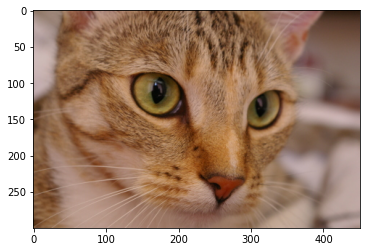

In [4]:
print(cat.shape)
plt.imshow(cat)

Converting Numpy array to Pytorch array.

Note that pytorch convention for images is BxCxHxW

In [5]:
import torch

In [6]:
torch_cat = torch.tensor(cat, dtype=torch.float32)
print(type(torch_cat))
print(torch_cat.shape)

<class 'torch.Tensor'>
torch.Size([300, 451, 3])


## Collab Note:
To enable GPU hardware accelerator, just go to **Runtime -> Change runtime type -> Hardware accelerator -> GPU**

## Function for tranfering arrays between gpu and cpu
.cuda() function is used to transfer an array to gpu memory

.cpu() function transfer an array to system memory

.device can be used to check where the array is present(you can also used device to select which gpu you want to move the array to in multi gpu setting)

.to() is also an useful function 

In [7]:
print('torch_cat is present on: ', torch_cat.device)

torch_cat_cuda = torch_cat.cuda()
print('torch_cat_cuda type: ',type(torch_cat_cuda))
print('torch_cat_cuda is present on: ', torch_cat_cuda.device)

torch_cat_cpu = torch_cat_cuda.cpu()
print('torch_cat_cpu is present on: ',torch_cat_cpu.device)
print('torch_cat_cpu type: ',type(torch_cat_cpu))

## .numpy() function doesnt work with arrays on gpu
torch_cat_numpy = torch_cat_cpu.numpy()
print('torch_cat_numpy type: ',type(torch_cat_numpy))

torch_cat is present on:  cpu
torch_cat_cuda type:  <class 'torch.Tensor'>
torch_cat_cuda is present on:  cuda:0
torch_cat_cpu is present on:  cpu
torch_cat_cpu type:  <class 'torch.Tensor'>
torch_cat_numpy type:  <class 'numpy.ndarray'>


# Nearest Neighbor Classifier

In [8]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784', cache=False)

x = torch.tensor( mnist.data.astype('float32'), dtype=torch.float32 )
y = torch.tensor( mnist.target.astype('int16'), dtype=torch.int16 )

In [10]:
D = x.shape[1]
Ntrain, Ntest = (2000, 10)
x_train, y_train = x[:Ntrain,:], y[:Ntrain]
x_test,  y_test  = x[Ntrain:Ntrain+Ntest,:], y[Ntrain:Ntrain+Ntest]

In [11]:
x_train.shape

torch.Size([2000, 784])

# Comparing a single test sample with the whole dataset

In [12]:
X_i = x_test[1:2, :] # (1, 784) test set
X_j = x_train[:, :]  # (2000, 784) train set
D_ij = ((X_i - X_j) ** 2).sum(-1) # (2000) 

In [13]:
D_ij.shape

torch.Size([2000])

In [14]:
values, ind_knn = torch.topk(D_ij, k=5, largest=False)  # Samples <-> Dataset, (N_test, K)
lab_knn = y_train[ind_knn]  # (N_test, K) array of integers in [0,9]
y_knn, _ = lab_knn.mode()   

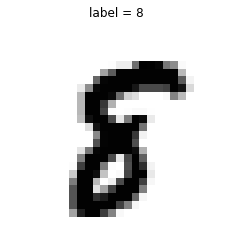

In [15]:
ax = plt.subplot(1,1,1)
ax.imshow( (255 - x_test[1]).view(28,28).detach().cpu().numpy(), cmap="gray" )
ax.set_title( "label = {}".format(y_knn.int()) )
plt.axis('off')
plt.show()

# Comparing all the test samples with the whole dataset


In [16]:
X_i = x_test[:, None, :] # (10, 1, 784) test set
X_j = x_train[None, :, :]  # (1, 2000, 784) train set
D_ij = ((X_i - X_j) ** 2).sum(-1) # (10, 2000) 

In [17]:
D_ij.shape

torch.Size([10, 2000])

In [18]:
values, ind_knn = torch.topk(D_ij, k=5, dim=1, largest=False)  # Samples <-> Dataset, (N_test, K)
lab_knn = y_train[ind_knn]  # (N_test, K) array of integers in [0,9]
y_knn, _ = lab_knn.mode()   # Compute the most likely label

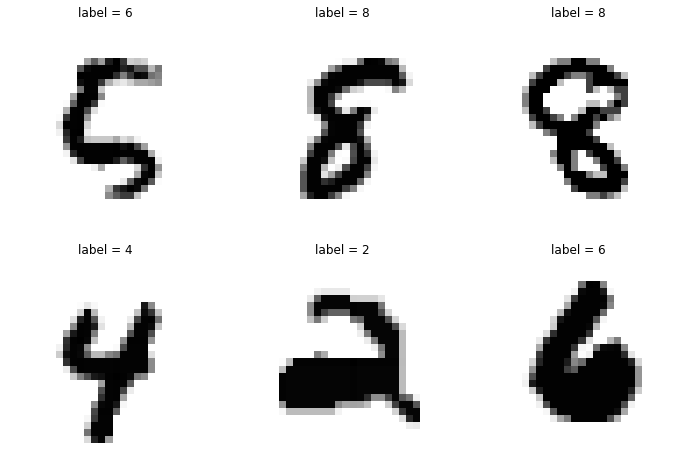

In [19]:
plt.figure(figsize=(12,8))
for i in range(6):
    ax = plt.subplot(2,3,i+1)
    ax.imshow( (255 - x_test[i]).view(28,28).detach().cpu().numpy(), cmap="gray" )
    ax.set_title( "label = {}".format(y_knn[i].int()) )
    plt.axis('off')

plt.show()

Exercise 1: Replace topk function with argmax function to retrieve only the closest sample.

Exercise 2: Notice that the we use L2 loss to compare images in the above example, replace L2 loss with L1 loss and compare results.

